# Lab 1: Forest Fire: Exploratory Data Analysis
### Jennifer Darrouzet & Lance Miles - W203-Sec2: Monday 4PM(PST)

# Introduction

The following analysis of historical forest fire data from Portuguese Montesinho Park is being conducted to inform the potential development of a general early warning system by X Corporation. XCorp hopes to sell wildfire early warning systems to localities such that these communities can prevent and minimize fire dangers to people, property, and their environments.

As part of their research into development of such a system, XCorp has asked the Darrouzet-Miles statistical analysis team to summarize the factors that can result in widespread wildfire damage. This preliminary exploration begins with the study of Montesinho Park's wildfire dataset, because they have collected environmental data related to 517 documented forest fire occurrences.

We appreciate XCorp's analysis business and hope our findings can help focus R&D efforts on system capabilities that will really move the needle. After all, XCorp customers will be more likely to procure and deploy/stage fire prevention and mitigation resources if they can develop confidence in XCorp's systems' ability to perform quickly and accurately. Ultimately, we hope XCorp can help render wildfires almost entirely preventable,  easily predictable, detectable, and curable - such that public safety, the environment, and regional economies are no longer threatened by ongoing fire danger. 

Please reach out if the team of Darrouzet-Miles can be of further assistance in these R&D efforts!


In [55]:
#setwd('/Users/JenD/W203/Lab_1')
#setwd('/Users/lancemiles/Documents/UC Berkeley/Statistics/Lab/Lab 1')
#setwd('/Users/lmiles/Documents/UC Berkeley MIDS/Stats/Lab 1')

if(!require(car)){
  install.packages("car")
  library(car)}
if(!require(repr)){
  install.packages("repr")
  library(repr)}
if(!require(ggplot2)){
  install.packages("ggplot2")
  library(ggplot2)}
if(!require(dplyr)){
  install.packages("dplyr")
  library(dplyr)}

wildfires <- read.csv(file = 'forestfires.csv')
wildfires <- data.frame(wildfires)
nrow(wildfires)

[1] 517

## Dataset description

For this project, we analyzed data collected across 517 fires recorded by personnel at Montesinho national park in Portugal. 

**The following 13 variables had been collected about each fire record:**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. Fine Fuel Moisture Code (FFMC) - FFMC index from the FWI system: 18.7 to 96.20 
6. Duff Moisture Code (DMC) - DMC index from the FWI system: 1.1 to 291.3
7. Drought Code (DC) - DC index from the FWI system: 7.9 to 860.6
8. Initial Spread Index (ISI) - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. Relative Humidity (RH) - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in hectares): 0.00 to 1090.84

## Data Quality Evaluation

There are no missing values in the dataset. 

In [56]:
anyNA(wildfires)

[1] FALSE

## Potential Duplication of Fire Records
We noticed three of the rows below (all on a Monday in December) are exactly the same in every column, except for the area measure. While this could be coincidence...we wish that we had unique ID numbers or timestamps for each measurement to better judge possible duplication.

The 4th row down also made us wonder if the rows may be reporting one fire that spans several tracts of the park during its lifetime? That could impact the analysis, and should be taken into account in further model development. A timestamp or unique record ID would again be helpful here.

In [57]:
head(wildfires[order(wildfires$temp, decreasing = FALSE),])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
281,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0,9.27
283,6,3,feb,sun,84.9,27.5,353.5,3.4,4.2,51,4.0,0,0.00
277,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,17.85
278,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,10.73
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,22.03
280,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,9.77


Further investigation revealed that there may be more duplicate variables. Once again, highlighting the need for unique IDs and/or timestamps associated with each data entry.

In [58]:
subset.wild = subset(wildfires, area > 0)
anom.check = subset.wild %>%
    group_by(month, day, ISI, DC, RH) %>%
    filter(n() >= 2) %>%
    arrange(month,day,X,Y)

head(anom.check, 10)
nrow(anom.check)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
6,5,apr,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0,4.61
6,5,apr,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0,10.93
2,2,aug,tue,94.8,108.3,647.1,17.0,24.6,22,4.5,0,8.71
2,2,aug,tue,94.8,108.3,647.1,17.0,24.6,22,4.5,0,10.01
3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,10.73
4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,17.85
4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,22.03
4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,9.77
4,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0,36.85
7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0,27.35


[1] 29

For the purposes of this analysis, the team chose to retain all records, regardless of their similarity to each other, because we were wary of artificially removing data in the absence of timestamps or unique fire record IDs. It is possible that keeping this data (if they are duplication) could cause our reported correlations to be stronger than they would otherwise be. Should XCorp procure another dataset with timestamp and unique record IDs present, we would certainly suggest performing an analysis as above to scrub the data for any duplication.

## Data Processing & Preparation

These data contain metric (e.g., FFMC, DMC, ISI) and categorical variables (i.e., X, Y, month, day).

As will be discussed in more detail in the univariate analysis below (**Section 3**), X and Y coordinates were transformed from their initial integers into ordered factors, and month and day-of-week were also transformed from strings into ordered factors. Relative Humidity (RH) came in as integers between 0-100 and was treated as a percentage. All other values were real number floats, and were treated as such during the analysis. 

We stored several variables as factors:

In [59]:
wildfires$X <- as.ordered(wildfires$X) 
wildfires$Y <- as.ordered(wildfires$Y)

months = c('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
           'aug', 'sep', 'oct', 'nov', 'dec')
wildfires$month = ordered(wildfires$month, levels=months)

DoW = c('mon','tue','wed','thu','fri','sat', 'sun')
wildfires$day <- ordered(wildfires$day, levels=DoW)

# Univariate Analysis

## Summary Statistics:

Within the forest fire dataset, the mean and median values for each variable are fairly close to each other with the exception of 2 variables. Interestingly, the rain and area variables show wildly different mean and median values, indicating that there are clear outliers in both. 

In [60]:
summary(wildfires)

       X      Y           month      day          FFMC            DMC       
 4      :91   2: 44   aug    :184   mon:74   Min.   :18.70   Min.   :  1.1  
 6      :86   3: 64   sep    :172   tue:64   1st Qu.:90.20   1st Qu.: 68.6  
 2      :73   4:203   mar    : 54   wed:54   Median :91.60   Median :108.3  
 8      :61   5:125   jul    : 32   thu:61   Mean   :90.64   Mean   :110.9  
 7      :60   6: 74   feb    : 20   fri:85   3rd Qu.:92.90   3rd Qu.:142.4  
 3      :55   8:  1   jun    : 17   sat:84   Max.   :96.20   Max.   :291.3  
 (Other):91   9:  6   (Other): 38   sun:95                                  
       DC             ISI              temp             RH        
 Min.   :  7.9   Min.   : 0.000   Min.   : 2.20   Min.   : 15.00  
 1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50   1st Qu.: 33.00  
 Median :664.2   Median : 8.400   Median :19.30   Median : 42.00  
 Mean   :547.9   Mean   : 9.022   Mean   :18.89   Mean   : 44.29  
 3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  

## Exploration of the Area Variable:

We first took a look at the area variable. As you can see in the table below and **Figure 2.2.1**, there are a two clear outliers where the area burned were 3 and 5 times greater than the next largest value. Since we are trying to identify key factors that affect the most damaging fires, we have decided to keep these data points in our exploratory analysis. We also identified that nearly 48% of the data contain area values of 0. 

In [61]:
head(n=5,wildfires[order(wildfires$area, decreasing = TRUE),])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
239,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0,1090.84
416,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0,746.28
480,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0,278.53
238,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0,212.88
237,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0,200.94


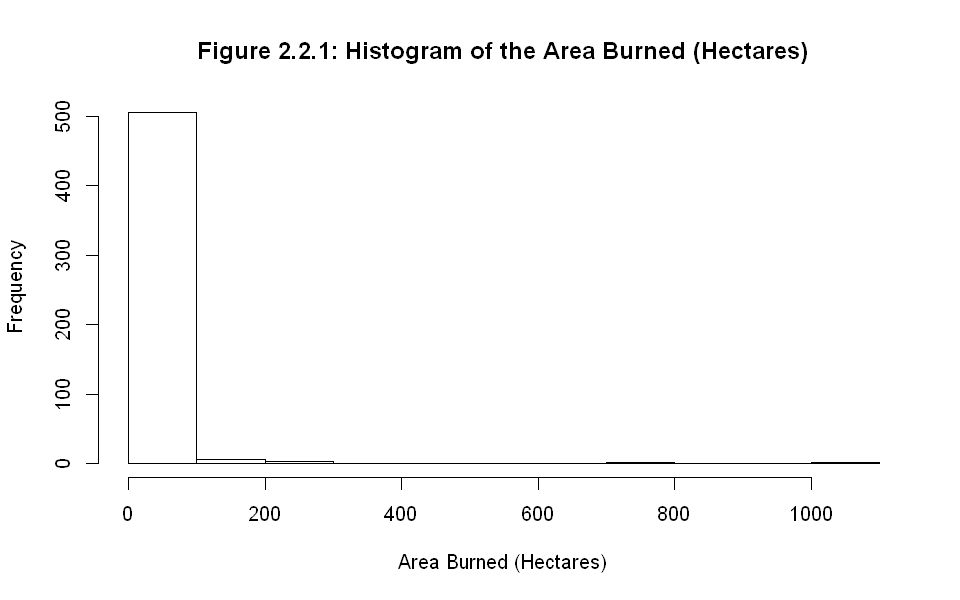

In [62]:
options(repr.plot.width=8, repr.plot.height=5)
hist(wildfires$area, xlab = "Area Burned (Hectares)", 
     main = "Figure 2.2.1: Histogram of the Area Burned (Hectares)")

In [63]:
small.fires = subset(wildfires, area == 0)
perc.s.fires = nrow(small.fires)/nrow(wildfires) * 100
paste(round(perc.s.fires, digits = 1), "%")

[1] "47.8 %"

Due to the spread of area values, we will take a log base 10 transformation of area values that are greater than 0 so that the data will fit a more normal distribution (**Figure 2.2**). This transformed variable will be stored as **area.log10** and will be used in the report as such.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0458  0.3304  0.8041  0.8012  1.1882  3.0378 

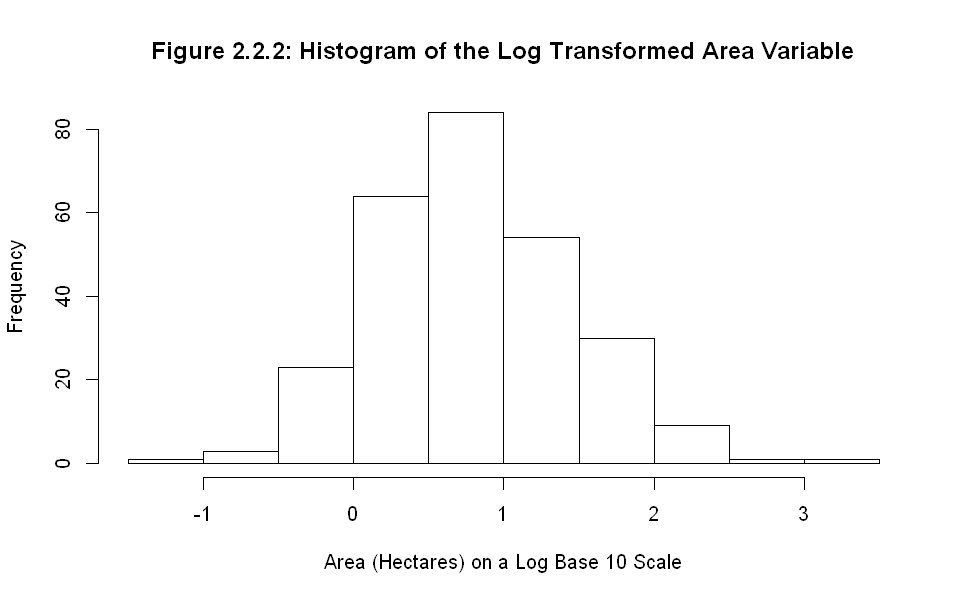

In [64]:
sub.wild = subset(wildfires, area > 0)
sub.wild$area.log10 = log10(sub.wild$area)
summary(sub.wild$area.log10)
options(repr.plot.width=8, repr.plot.height=5)
hist(sub.wild$area.log10, breaks = 10, 
     main = "Figure 2.2.2: Histogram of the Log Transformed Area Variable", 
     xlab = "Area (Hectares) on a Log Base 10 Scale")

Among fires that burn greater than 0 hectares, the median and mean value becomes roughly 6 hectares (log value of 0.8). Based on the histogram, we also observe a spike in the number of fires around 6 hectares or 0.8 on the log scale. For the purpose of this analysis, we are defining particularly damaging forest fires as fires with an area value that is greater than or equal to 6 hectares. This constitutes roughly 26.3% of the data.

In [65]:
wildfires$area.log10 = log10(wildfires$area)
fire.sub = subset(wildfires, area.log10 > 0.8)
perc.b.fires = nrow(fire.sub)/nrow(wildfires)*100
paste('Percentage of fires defined as "particularly damaging":', 
      round(perc.b.fires, digits = 1), "%")

[1] "Percentage of fires defined as \"particularly damaging\": 26.3 %"

In [66]:
summary(fire.sub)

       X      Y          month     day          FFMC            DMC        
 4      :31   2: 8   sep    :49   mon:18   Min.   :63.50   Min.   :  3.60  
 6      :23   3:20   aug    :43   tue:20   1st Qu.:90.45   1st Qu.: 55.58  
 2      :19   4:52   mar    :12   wed:12   Median :91.60   Median :117.55  
 8      :18   5:33   jul    : 8   thu:13   Mean   :90.88   Mean   :113.55  
 7      :16   6:22   dec    : 8   fri:21   3rd Qu.:93.30   3rd Qu.:141.30  
 1      :13   8: 1   feb    : 6   sat:26   Max.   :96.10   Max.   :290.00  
 (Other):16   9: 0   (Other):10   sun:26                                   
       DC             ISI              temp             RH       
 Min.   : 15.3   Min.   : 0.800   Min.   : 2.20   Min.   :15.00  
 1st Qu.:428.9   1st Qu.: 6.775   1st Qu.:15.40   1st Qu.:30.75  
 Median :665.5   Median : 8.400   Median :20.00   Median :40.50  
 Mean   :551.0   Mean   : 9.033   Mean   :18.90   Mean   :43.09  
 3rd Qu.:706.5   3rd Qu.:11.325   3rd Qu.:23.32   3rd Qu.:54.0

## Exploration of Rain and Moisture Variables:

Several variables are related to water content:
* Rain in $mm/m^2$ (a measure of liquid water falling at the time of the fire)
* RH (relative humidity, a percentage of partial pressure of gaseous water molecules in the outside air)
* DC (drought code - a number calculated to indicate dryness conditions)
* DMC (duff moisture code - another calculated term related to environmental moisture) 
* FFMC (fine fuel moisture code - another calculated term related to the condition of combustible materials in the environment)

**Rain** -  Liquid water is a primary natural fire retardant/suppressant (at least for grass & wood fires). So it's not surprising that only 1.5% (8 out of 517) of the fires reported in this inventory occurred when rain was also recorded. Given that rain occurred, rain amounts between 0.2mm  and 6.4mm were logged. 

Only 2 rainy-day fires had a non-zero burn area recorded. With our definition of "particularly damaging" fires constituting those that burn  6 or more hectares, just one single rainy-day fire qualified as particularly damaging in our analysis. The singular "particularly damaging" rainy-day fire precludes our team from further study of relationships (especially linear ones!) with just one rainy-day datapoint. Please see more discussion of the effects of rain in secondary effects (**Section 4**), where we provide XCorp with additional guidance on this topic. It is possible that the event of rain nearly always prevents the emergence and/or spread of fires; additional data would be needed for further study.

In [67]:
rain = subset(wildfires, rain > 0)
check = nrow(rain)/nrow(wildfires)*100
paste("Percentage of fires that occured when rain was present: ", 
      round(check, digits = 1), "%")

[1] "Percentage of fires that occured when rain was present:  1.5 %"

In [68]:
rain.sub = subset(fire.sub, rain > 0)
rain.sub

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area.log10
500,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,1.034227


**Relative Humidity (RH)** - When the relative humidity is high, the air contains above-average water content. At 100% relative humidity, conditions can produce rain, fog, and/or reach the dew point (water condenses on ground surfaces). It's also not surprising that the majority of fires in this dataset occurred when Relative Humidity (RH) was below 50% (see **Figure 2.3.1** and summary stats from **Section 2.1** and **Section 2.2**). 

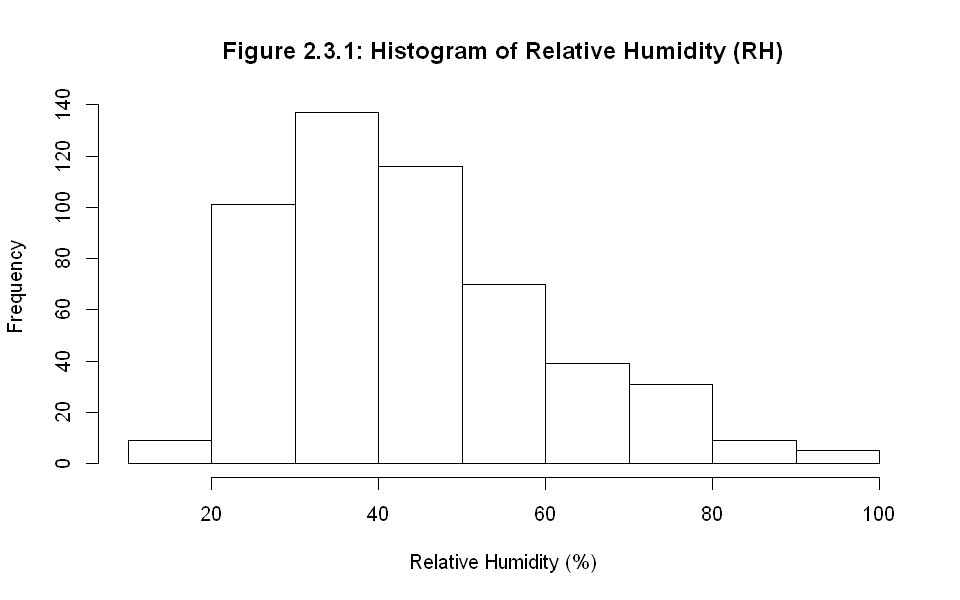

In [69]:
options(repr.plot.width=8, repr.plot.height=5)
hist(wildfires$RH, main = "Figure 2.3.1: Histogram of Relative Humidity (RH)", 
     xlab = "Relative Humidity (%)")

Because the team had seen the fire retardant/suppressant effects of rain, we double-checked the fires reported in the top decile of RH. The only non-spot fire in this region burned 26 hectares during an unseasonably cold day (5 degrees C) in an otherwise dry August. As August seems to be a very volatile weather month in Portugal (in terms of humidity, temperature, and wind - see **Figure A.1**), this seemed reasonable to the team and was included in the analysis, not treated as an outlier.

In [70]:
head(wildfires[order(wildfires$RH, decreasing=TRUE),])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area.log10
380,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0,-Inf
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,-Inf
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,-Inf
212,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26,1.414973
305,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0,-Inf
287,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0,-Inf


**Drought Code (DC)** - Looking at another measure of moisture, the majority of fires occurred when the Drought Code (DC, range 7.9-860.6, mean 547.9, median 664.2 **Section 2.1**) was in the upper half of its range (**Figure A.3**).

When a region has a drought, it suffers from an ongoing *lack* of water. It's important to note for further analysis (and especially for R&D by the XCorp team) that high RH and high DC mean *opposite* amounts of water, with high RH indicating the presence of above-average amounts of water in the air, and high DC meaning below-average amounts of water on the ground (and also likely low amounts of water in nearby creeks, streams, rivers....and low amounts of moisture in the dead grass, leaves, twigs, etc. that one finds on the ground in the region).

The mean (551.0) and median (665.5) (**Section 2.2**) values do not change much in the subset of data defined as "particularly damaging" with values ranging from 15.3-855.3 (**Figure A.4**).

The team found that two other variables in our dataset had this "inverse" relationship with water mass - and they were somewhat misleadingly named, along the lines of the above discussion: the **FFMC (fine fuel moisture code)** and the **DMC (duff moisture code)**. Care must be taken to interpret these two variables correctly, despite their unfortunate names.

**Fine Fuel Moisture Code (FFMC)** - Although the term "moisture" is in this code's name, the code takes on higher values when conditions are *drier*. The mean and median value remain similar in both the subset and entire datasets (mean ~90, median ~91). Interestingly enough, the range of fine fuel moisture code went from 18.78-96.20 to 63.50-96.10 (**Section 2.1** & **Section 2.2**) for fires burning greater than 6 hectares. Although this seems like a drastic change in the lower bound, it is important to note that the original dataset only had one value that was recorded at 18.78, while the next lowest value was 50.4 (table below). We can still see a dramatic difference between the lower bounds of each dataset where FFMC takes on values around 50 for the original dataset, while FFMC starts at around 80 for the subset of fires that burned greater than 6 hectares. Although 18.7 is an outlier, it takes on an area value of 0 and does not affect our overall analysis.

In [71]:
head(wildfires[order(wildfires$FFMC, decreasing=F),], 3)
head(fire.sub[order(fire.sub$FFMC, decreasing=F),], 3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area.log10
380,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0,0,-Inf
313,2,4,sep,sun,50.4,46.2,706.6,0.4,12.2,78,6.3,0,0,-Inf
300,6,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0,0,-Inf


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area.log10
200,2,4,sep,mon,63.5,70.8,665.3,0.8,22.6,38,3.6,0,11.32,1.0538464
466,2,2,feb,sat,79.5,3.6,15.3,1.8,4.6,59,0.9,0,6.84,0.8350561
197,6,5,apr,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0,10.93,1.0386202


Note in the below histogram (**Figure 2.3.2**)how the vast majority of fires occur when the FFMC is in its upper range of values:

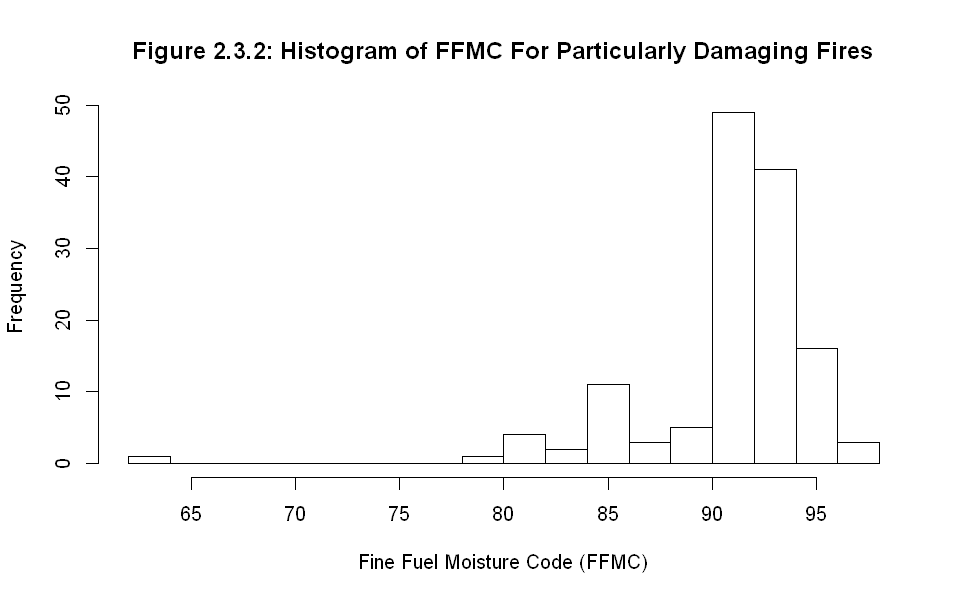

In [72]:
options(repr.plot.width=8, repr.plot.height=5)
hist(fire.sub$FFMC, breaks = 20, 
     main = "Figure 2.3.2: Histogram of FFMC For Particularly Damaging Fires", 
     xlab = "Fine Fuel Moisture Code (FFMC)")

The XCorp team will notice in “Key Relationships” (**Section 3**) that FFMC increases as temperature increases, and decreases as relative humidity grows. It is also correlated with the Initial Spread Index (ISI)(**Figure 3.1**). Without looking up the exact formula, we’ve found enough evidence that we’d recommend thinking of this instead as the “fine fuel measure of combustibility” (as if we could redefine fire industry terms).

**Duff Moisture Code (DMC)** - In our “particularly damaging” subset, DMC ranges from 4.9-290.0. In this subset, it correlates strongly (0.69) with drought code (DC, see **Figure 3.1**), and also correlates less strongly with temperature (0.48) and the FFMC (0.48). Without further research regarding the exact formula for this code, the team has still come to the conclusion that high DMC in fact reflects a lack of water (similar to the FFMC above).

## Exploration of Initial Spread Index (ISI) Variable:

It didn't make a lot of sense to the team that the fire with the highest Initial Spread Index (ISI) burned 0 hectares (it didn't spread very much). Based on the histogram below (**Figure 2.4.1**), it appears this "maximum ISI" fire record is an extreme outlier/potential coding error. The spread of a fire is typically interpreted as a negative outcome in terms of damage to people, property, and the environment (unless the burn is a prescribed one, completed by trained professionals who use the spread for land management purposes). In this dataset, ISI (the Initial Spread Index) was reported in the range of 0-56.1, though (as described above and depicted in **Figure 2.4.1**), we suspect that the single extreme outlying maximum value of ISI (56.1) may be an error. As the fire with which this 56.1 ISI value was associated burned a reported 0 hectares, this fire does not end up being included in our "particularly-damaging fires" subset (see how this subset is defined in **Section 2.2**), and therefore does not impact the team's analysis.

In [73]:
head(n=3,wildfires[order(wildfires$ISI, decreasing = TRUE),])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area.log10
23,7,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0,0.00,-Inf
267,6,5,aug,tue,94.3,131.7,607.1,22.7,19.4,55,4.0,0,0.17,-0.7695511
12,7,5,sep,sat,92.8,73.2,713.0,22.6,19.3,38,4.0,0,0.00,-Inf


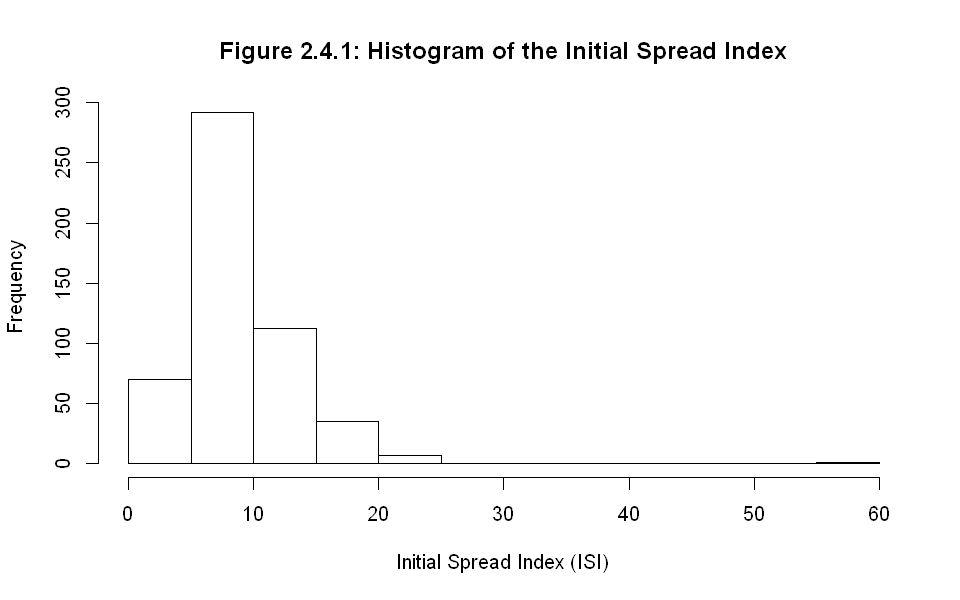

In [74]:
options(repr.plot.width=8, repr.plot.height=5)
hist(wildfires$ISI, xlab = "Initial Spread Index (ISI)", 
     main = "Figure 2.4.1: Histogram of the Initial Spread Index")

Without the extreme outlier for ISI,  the minimum (0) and median (8.4) ISI values don't change (**Section 2.1 & Section 2.2**), but the mean value drops from 9.02 to 8.93, which is closer to the mean value. The new maximum is 22.7, which is less than half the value of the highest ISI in the dataset. Although there is a slight skew in the ISI data (**Figure 2.4.2**), the data has a more reasonable spread.

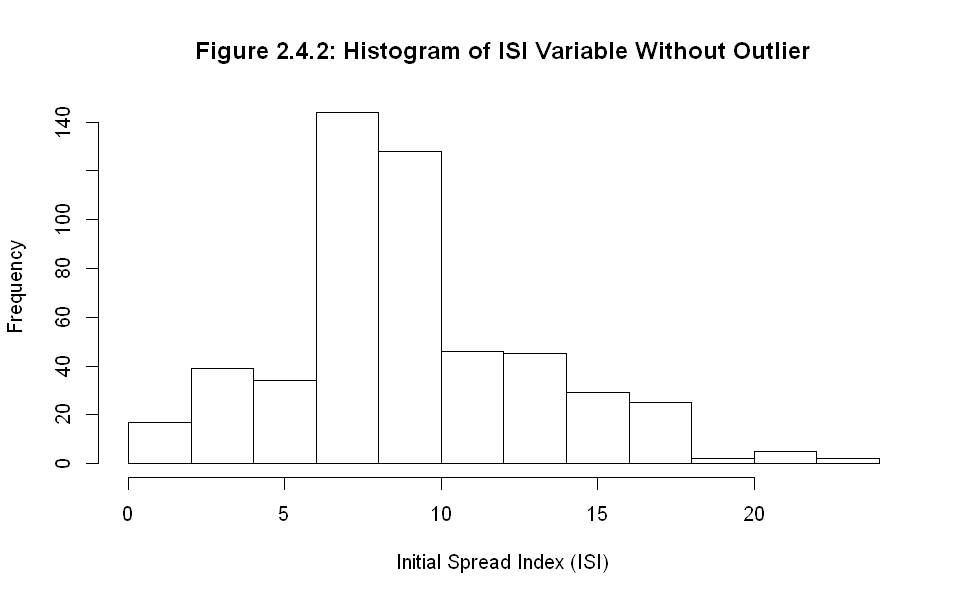

In [75]:
cappedISI = subset(wildfires, ISI < 30)
options(repr.plot.width=8, repr.plot.height=5)
hist(cappedISI$ISI, breaks = 15, 
     main = "Figure 2.4.2: Histogram of ISI Variable Without Outlier", 
     xlab = "Initial Spread Index (ISI)")

## Exploration of Seasonality Aspects:

There is a clear relationship between month of the year and fires. From the data, we found that 68.9% of all fires occured in the months of August or September, which accounted for over 81.1% of hectares burned. Of the "particularly damaging" fires, 67.6% of these fires occured in August or September, which accounted for over 81.4% of hectares burned among these damaging fires. 

Over half of the fires occur on Fridays, Saturdays, or Sundays for both the entire dataset and the subset of damaging fires.

Please refer to **Section 2.2** for how we define "particularly damaging".

In [76]:
month.check.occur = subset(wildfires, month == "aug" | month == "sep" )
p.month.occur = nrow(month.check.occur)/nrow(wildfires)*100
paste("Percentage of fires that occur in September or August:", 
      round(p.month.occur, digits = 1), "%")

month.check.occur.sub = subset(fire.sub, month == "aug" | month == "sep" )
p.month.occur = nrow(month.check.occur.sub)/nrow(fire.sub)*100
paste('Percentage of "particularly damaging" Fires that occur in September or August:', 
      round(p.month.occur, digits = 1), "%")

[1] "Percentage of fires that occur in September or August: 68.9 %"

[1] "Percentage of \"particularly damaging\" Fires that occur in September or August: 67.6 %"

In [77]:
month.total = sum(month.check.occur$area)
total.damage = sum(wildfires$area)
p.month.damage = month.total/total.damage*100
paste("Percentage of hectares burned in September or August:", 
      round(p.month.damage, digits = 1), "%")

month.total.sub = sum(month.check.occur.sub$area)
total.damage.sub = sum(fire.sub$area)
p.month.damage.sub = month.total.sub/total.damage.sub*100
paste('Percentage of hectares burned among "particulary damaging" ',
      'fires in September or August:', 
      round(p.month.damage.sub, digits = 1), "%")

[1] "Percentage of hectares burned in September or August: 81.1 %"

[1] "Percentage of hectares burned among \"particulary damaging\"  fires in September or August: 81.4 %"

In [78]:
fires.days = wildfires %>% group_by(day) %>% summarise(occur = n())
fires.days.inc = fire.sub %>% group_by(day) %>% summarise(occur = n())

fires.days.inc.t.sub = subset(fires.days, day == "sun" | day == "fri" | day == "sat")
fires.days.inc.sub = subset(fires.days.inc, day == "sun" | day == "fri" | day == "sat")

p.day.occur = sum(fires.days.inc.t.sub$occur)/sum(fires.days$occur)*100
paste("Percentage of fires that occur on Friday, Saturday, or Sunday:", 
      round(p.day.occur, digits = 1), "%")

p.day.occur.sub = sum(fires.days.inc.sub$occur)/sum(fires.days.inc$occur)*100
paste('Percentage of "particularly damaging" fires that occur on ',
      'Friday, Saturday, or Sunday:', 
      round(p.day.occur.sub, digits = 1), "%")
paste('Percentage of fires one might expect on 3 random days in a week:', 
      round(3/7*100, digits = 1), "%")

[1] "Percentage of fires that occur on Friday, Saturday, or Sunday: 51.1 %"

[1] "Percentage of \"particularly damaging\" fires that occur on  Friday, Saturday, or Sunday: 53.7 %"

[1] "Percentage of fires one might expect on 3 random days in a week: 42.9 %"

Comparing the percentages above, it's clear that day of week (an entirely human concept) is having an effect on fire occurrence, boosting the likelihood of fires on weekend days by 8.2% overall, and boosting the likelihood of particularly damaging fires on weekend days by 10.8%.

## Exploration of The Wind Variable
Overall, fires occurred fairly evenly distributed across a wind speed range of 0.4km/h-9.4km/h, with a slight right skew in terms of frequency (**Figure 2.6.1**). 

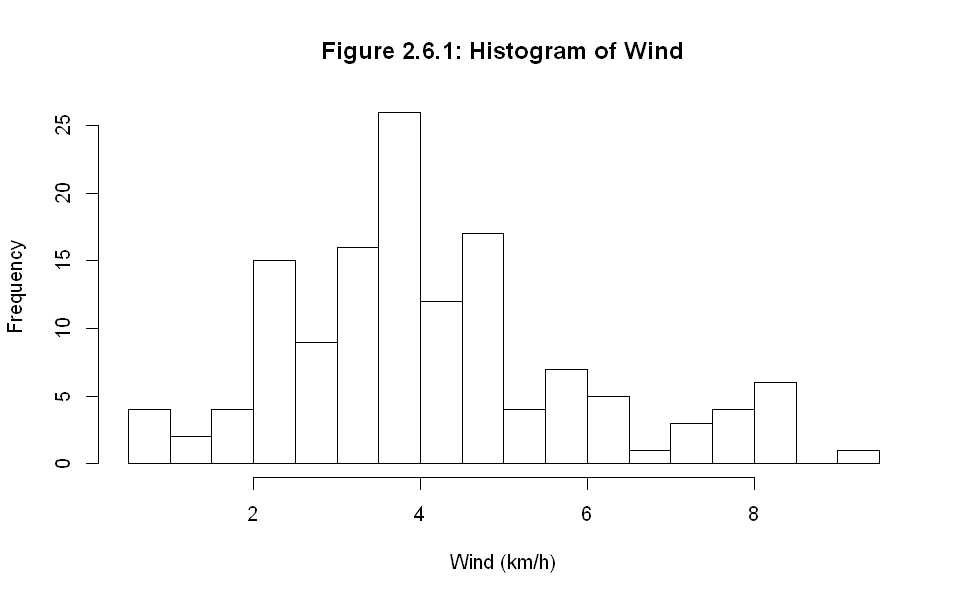

In [79]:
options(repr.plot.width=8, repr.plot.height=5)
hist(fire.sub$wind, breaks = 15, 
     main = "Figure 2.6.1: Histogram of Wind", xlab = "Wind (km/h)")

# Analysis of Key Relationships (Bivariate Analysis)

To begin our analysis of key relationships, we tabulated correlations between numerical variables, and plotted them using scatterplotMatrix. As described in **Section 2.2**, we will be focusing our analysis of key relationships on fires that burned 6 hectares or more (area.log10 > 0.8).

In [80]:
round(cor(fire.sub[, c("FFMC", "DMC", "DC", "ISI", "temp", 
                       "RH", "wind", "area.log10")]),3)

,FFMC,DMC,DC,ISI,temp,RH,wind,area.log10
FFMC,1.000,0.480,0.354,0.717,0.519,-0.214,-0.184,0.092
DMC,0.480,1.000,0.688,0.347,0.477,0.107,-0.207,0.127
DC,0.354,0.688,1.000,0.255,0.513,-0.064,-0.198,0.116
ISI,0.717,0.347,0.255,1.000,0.467,-0.092,0.043,-0.020
temp,0.519,0.477,0.513,0.467,1.000,-0.400,-0.396,0.171
RH,-0.214,0.107,-0.064,-0.092,-0.400,1.000,0.085,-0.106
wind,-0.184,-0.207,-0.198,0.043,-0.396,0.085,1.000,0.002
area.log10,0.092,0.127,0.116,-0.020,0.171,-0.106,0.002,1.000


We observed in the table above within our particularly damaging subset relatively strong positive correlations (0.3+) between variables such as DMC/FFMC(0.48), DC/FFMC(0.35), ISI/FFMC(0.72), temp/FFMC (0.52), DC/DMC (0.69), ISI/DMC (0.35), temp/DMC (0.48), temp/DC (0.51), and temp/ISI(0.47). There are also weaker positive correlations (0.1 - 0.3) among RH/DMC(0.11), area.log10/DMC (0.13), ISI/DC (0.26), are.log10/DC (0.12),  and area.log10/temp (0.17). There is also a strong negative correlation between RH/temp (-0.40) and wind/temp (-0.40), while we observe weaker negative correlations among RH/FFMC (-0.21), wind/FFMC (-0.18), wind/DMC (-0.21), wind/DC (-0.20), RH/ISI (-0.09), and area.log10/RH (-0.11) Many of these correlations can be visualized in (**Figure 3.0.1**) below. Although some of these correlations seem strong, it is important to note that some interactions may be too noisy to interpret. For instance, DC seems to have two different populations, which may be artificially skewing the correlations. It is also important to note that some of these interactions may not make complete sense. We will discuss this further in **Section 4**.

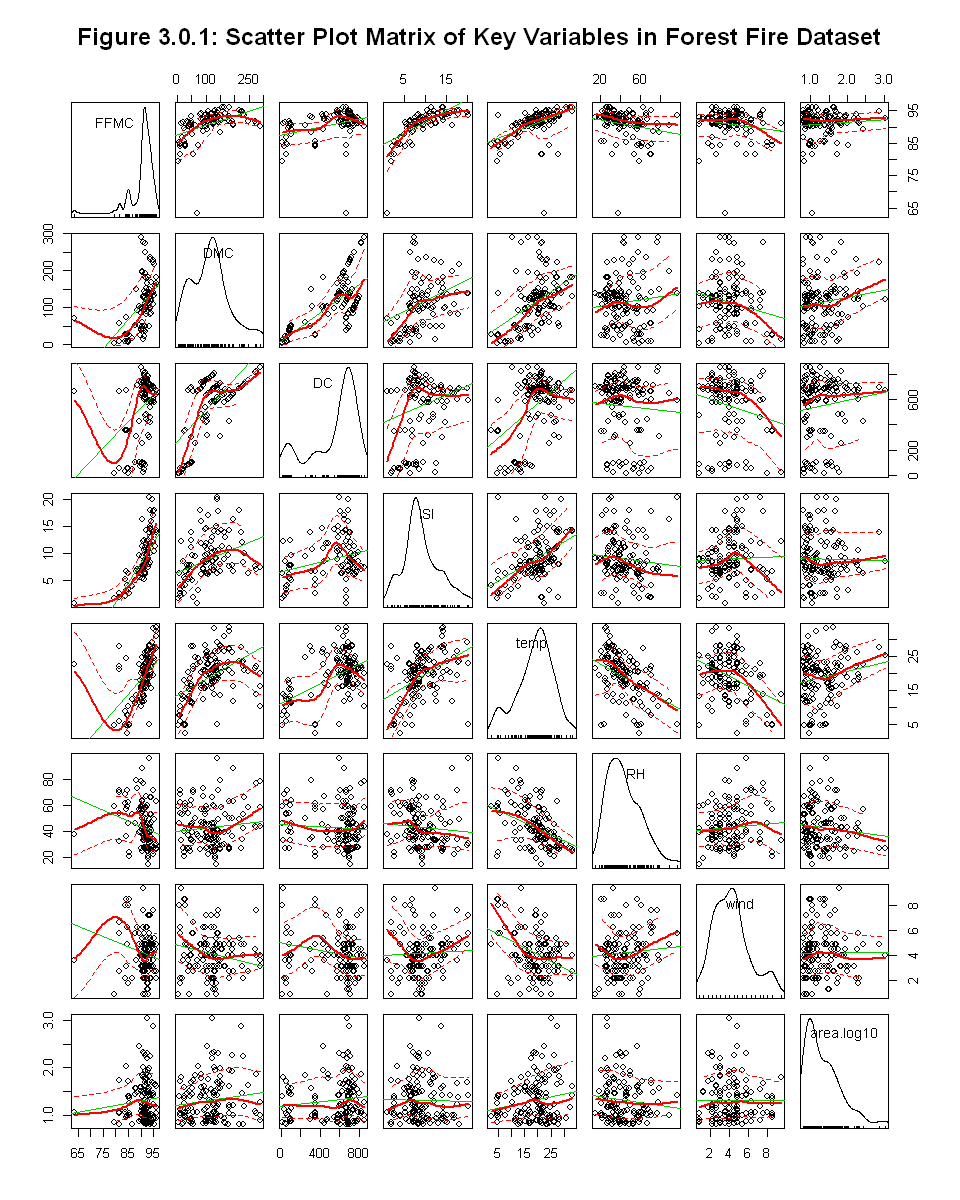

In [81]:
options(repr.plot.width=8, repr.plot.height=10)
scatterplotMatrix(~ FFMC + DMC + DC + ISI + temp + RH + wind + area.log10, 
    data = fire.sub, 
    main = "Figure 3.0.1: Scatter Plot Matrix of Key Variables in Forest Fire Dataset")

## Relationship Between Fire Location and Area Burned:

We wanted to see if there was a relationship between the location of a fire and the total hectares burned. Interestingly enough, the diagram below (**Figure 3.1.1**) demonstrates that there are specific regions in the park where fires seem to cause more damage. These findings are consistent with the number of fires that occured in each region of the park (**Section 2.7**).

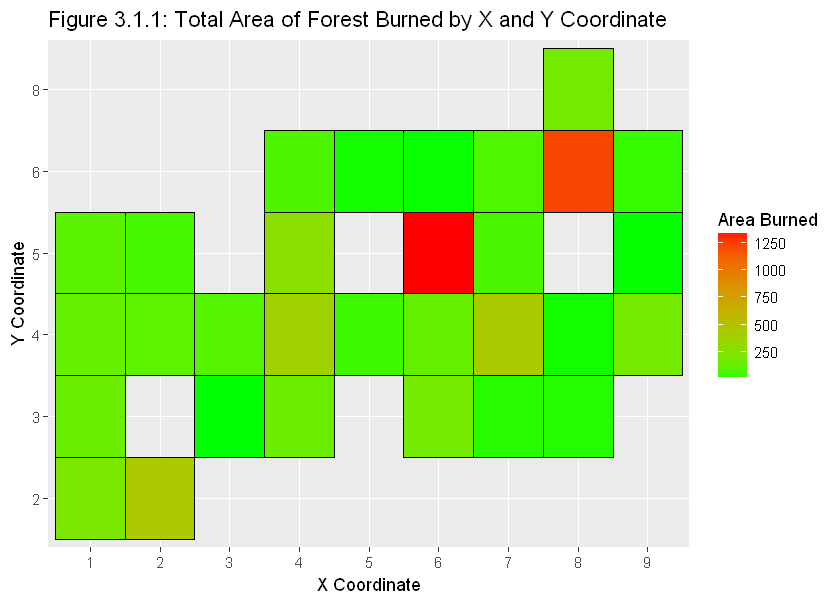

In [82]:
total.area.cor = fire.sub %>% group_by(X, Y) %>% summarise(total = sum(area))

options(repr.plot.width=7, repr.plot.height=5)
#Code adapted from 
#http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html
#14 May 2018
ggplot(total.area.cor, aes(X, Y, fill = total)) + geom_tile(colour = "black")  + 
    scale_fill_gradient(low="green", high="red") + 
    labs(x="X Coordinate", y="Y Coordinate",
    title = "Figure 3.1.1: Total Area of Forest Burned by X and Y Coordinate", 
    fill="Area Burned")

## Seasonality Aspects

We further investigated whether or not there were seasonality aspects to these data. Specifically, whether or not particularly damaging fires frequently occured in specific months and days of the week. As you can see in the chart below (**Figure 3.2.1**), it is clear that Saturdays and Sundays in the months of August and September can be especially problematic.

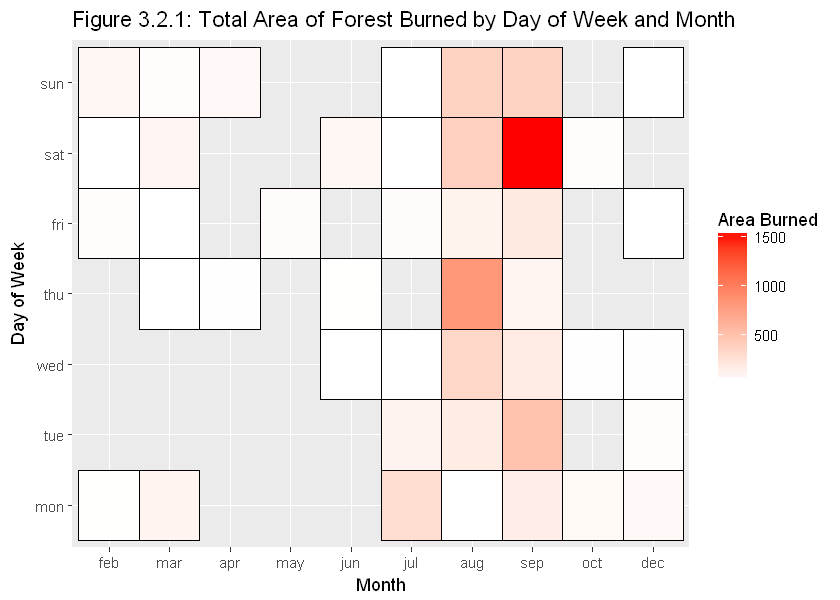

In [83]:
total.area = fire.sub %>% group_by(month, day) %>% summarise(total = sum(area), 
    median = median(area), mean = mean(area))

options(repr.plot.width=7, repr.plot.height=5)
ggplot(total.area, aes(month, day, fill = total)) + geom_tile(colour = "black") +
    scale_fill_gradient(low="white", high="red") + 
    labs(x="Month", y="Day of Week",
    title = "Figure 3.2.1: Total Area of Forest Burned by Day of Week and Month", 
    fill="Area Burned") 

## Relationship Between Month and Temperature

Among particularly damaging forest fires, there is a clear relationship between temperature and month where the temperature peaks in the summer from June through September, and falls during the winter (**Figure 3.3.1**). This is particularly interesting because we only see a peak in the number of fires that occur in August through September. This will be discussed further in **Section 4**.

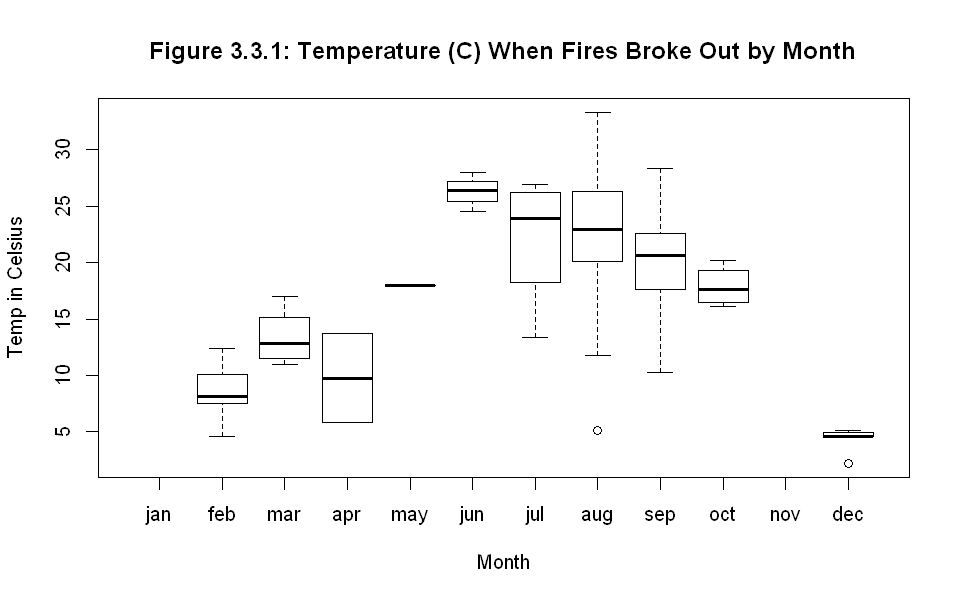

In [84]:
options(repr.plot.width=8, repr.plot.height=5)
boxplot(temp ~ month, data = fire.sub, 
  xlab = "Month", ylab = "Temp in Celsius",
  main = "Figure 3.3.1: Temperature (C) When Fires Broke Out by Month")

## Relationship Between Drought Code and Duff Moisture Code
Months that experienced more than 42 particularly damaging fires show a clear separation in populations (**Figure 3.4.1**) versus months that had fewer than 42 particularly damaging fires. Although this is an interesting observation, there are only two months that contribute to the points represented in green, which are August or September. Though it is clear that there is a difference in the DMC and DC relationship for August and September relative to all other months, there may be other factors that affect this reading. Temperature, for instance, is hottest in these months, which would likely affect the drought code and duff moisture code.

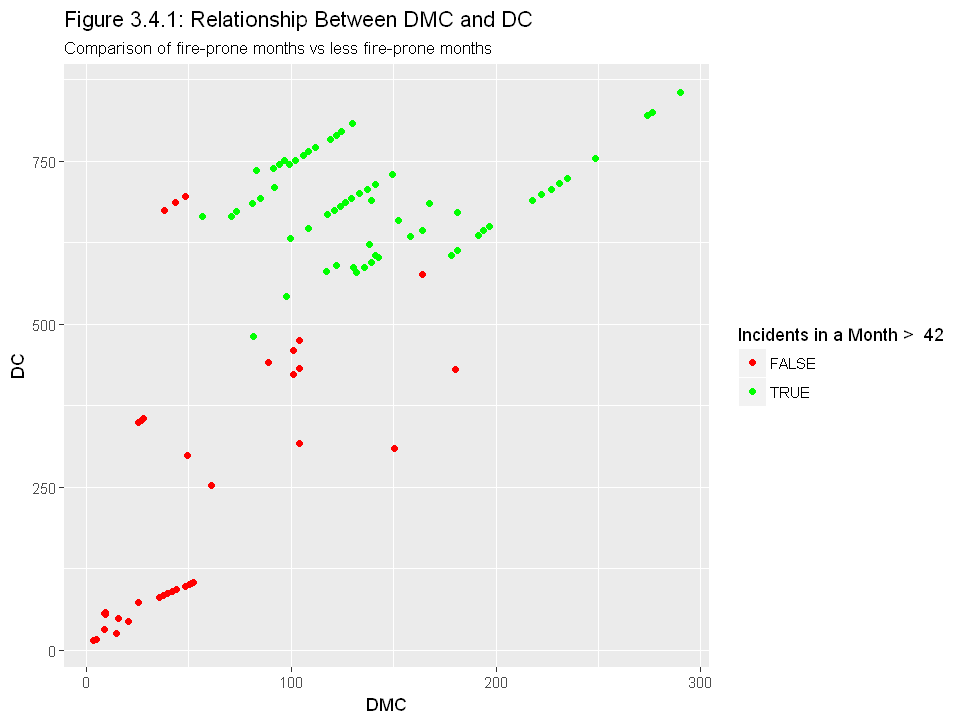

In [85]:
incidents.sub = fire.sub %>% group_by (month) %>% mutate(occur = n())

inc.cut = 42
options(repr.plot.width=8, repr.plot.height=6)
ggplot(incidents.sub) + geom_point(aes(x = DMC, y = DC, colour = occur > inc.cut)) +
  scale_colour_manual(name = paste('Incidents in a Month > ', inc.cut), 
  values = setNames(c('green','red'),c(T, F))) +
  xlab('DMC') + ylab('DC') +labs(title = 'Figure 3.4.1: Relationship Between DMC and DC', 
  subtitle = 'Comparison of fire-prone months vs less fire-prone months')

## Relationship Between Fine Fuel Moisture Code (FFMC) and Initial Spread Index (ISI)
Among particularly damaging fires, there is a really interesting relationship between Fine Fuel Moisture Code and Initial Spread Index (**Figure3.5.1**). We observe a layering effect, almost like an onion, as both FFMC and ISI increase in value. These two variables may be related in how they are calculated. Further discussion is included in **Section 4: Correlation Plots**.

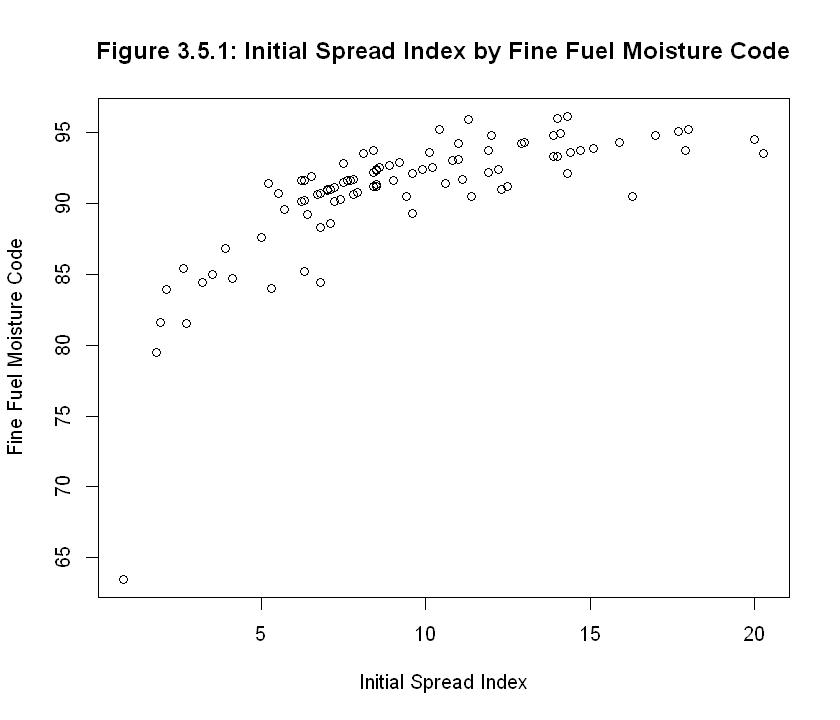

In [86]:
options(repr.plot.width=7, repr.plot.height=6)
plot(x = fire.sub$ISI, y = fire.sub$FFMC, 
     main = "Figure 3.5.1: Initial Spread Index by Fine Fuel Moisture Code", 
     xlab = "Initial Spread Index", ylab = "Fine Fuel Moisture Code")

## Relationship Between Relative Humidity and Area Burned
We wanted to investigate whether or not fires that occurred when relative humidity was low resulted in more damage than fires that occured when relative humidity was high. To our surprise, we found that fires occuring in low relative humidity burned nearly 3x more total area than fires burned in high relative humidity (**see below**).

In [87]:
moistfires = subset(fire.sub, RH >= summary(fire.sub$RH)['3rd Qu.'])
moistfires = sum(moistfires$area)
drierfires = subset(fire.sub, RH <= summary(fire.sub$RH)['1st Qu.'])
drierfires = sum(drierfires$area)
damage.low.humidity = round(drierfires/moistfires, digits = 2)

paste('Fires that occur in low humidity do', damage.low.humidity, 
      'x more damage than fires that occur in high humidity.')

[1] "Fires that occur in low humidity do 2.93 x more damage than fires that occur in high humidity."

# Secondary Effects

#### Regionality:
As we observed in the exploratory data analysis, there is a clear relationship between region of the park, number of fires that occur, and the total number of hectares burned. Unfortunately, it is hard to explain these findings with the data we currently have. Despite trying to break down the analysis by region, we were unable to find any significant relationships through the variables. There are a few potential explanations, but further data are required to evaluate whether or not any of these hypotheses hold true. The regions of the park that experience the most fires could have the most campsites and/or picnic areas. Receiving a map of campsites/picnic areas would help us understand if this may be the case. This regionality effect might also be explained by how remote these regions may be. Specifically, it may be that these regions are too far from accessible roads for rescue teams to arrive in a timely manner, or these regions may be located in an area where fires are hard to detect and therefore response time is delayed. 

#### Seasonality:
There is a clear relationship between month, day of the week, and the number of fires that occur. It is possible that this is due to the frequency of park visitors and/or an increase in the number of people camping. Regional school holiday schedules could have an effect. This may lead to more individuals starting fires that burn uncontrollably. Another theory could be because August and September are some of the hottest months of the year. If this were true, it is odd that July does not see a same increase in the frequency of fires. One explanation could be that the shrubbery and fuel are still drying out from the spring months. If this were the case, then it is possible that we would see a shift in variables such as Fine Fuel Moisture Code (FFMC) and Duff Moisture Code as the season progressed, but more data are required to properly evaluate this.

#### Correlation Plots:
In the exploratory data analysis we observed a few very strong correlations in the data. Although we would like to believe that these variables are completely independent of each other and predictive of each other's outcomes, there are likely other variables in play that are adding to the relationship. For instance, we are unable to evaluate how rain plays a role in all of these correlations. We observed extremely high correlations between FFMC and ISI, and DC and DMC, but we do not have any data around how long it has been since the last time it rained. We are also not aware of how these values are calculated, so it is possible that the calculation of these variables use the same inputs or even each other. More information is needed to further investigate this. Another interesting observation we identified was that wind was correlated with DC, DMC, and temp (all of which had a correlation with area.log10), and yet wind did not show any correlation with potentially damaging fires. There may be another variable in play that we are not seeing that is affecting how we interpret the relationship between wind and area.log10.

#### Other Potential Secondary Effects:
There are no causes of fires listed in the dataset. The cause of a fire will help determine whether or not the regionality effect we observed is due to campers misusing firepits, or these data may play a role in how we interpret the interplay of the variables in the dataset. Early on in this exploratory analysis we identified potential anomalies in the data. It is possible that we are analyzing the same data point twice and that there are data entry duplications/errors. Since there are no unique identifiers there is no way to track these data back to any source documents (e.g., notebooks, journals, logs). Because of the nature of the data, it is also difficult to understand if there were fires that spread into different regions. If a fire were to spread into another coordinate, than this would affect how we interpret the results, and confound how we understand the working relationship between each of these variables. There is also no date and time stamp. We were provided a dataset on "recent" fires in Montesinho park, but "recent" may be more than one year with varying seasons. This may add unexplainable noise to our data and the relationships we seek to tease out. The dataset contains no time effects, such as a burn in one quarter making a burn in the subsequent quarter less likely, or torrential downpours in one week suppressing fire spread in a subsequent week. Similarly, drought conditions in the early summer could not be examined with regard to fine fuel combustibility later in the same summer. It is advised that XCorp pursue analysis of datasets inclusive of such time-series data before developing further algorithms.


# Conclusion

As part of XCorp's research into the development of a forest fire early warning system, the team of Jennifer Darrouzet and Lance Miles were contracted to perform statistical analysis on an inventory of forest fires that were logged in Montesinho Park in Portugal. 517 fires occurring in this park were analyzed with the aim of identifying which - if any - of the 13 recorded variables could be identified as key factors worthy of further investigation by XCorp. This report recommends XCorp consider the following variables as important to their R&D efforts; these variables were associated with particularly damaging fires that XCorp's early warning systems would do well to warn communities about. Further research may find that some of these recommended variables could have detection and/or prediction capabilities relevant and useful to XCorp product R&D. 

## Defining Particularly Damaging Fires
For the purpose of this analysis, particularly damaging forest fires are defined as any fire with a log base 10 area value greater than 0.8, translating to fires that burned roughly six hectares or more. This cutoff was determined by evaluating the quartiles and histogram of the area log values. We recognize that this cutoff adds noise to the lower end of our analysis, but we feel that this is an appropriate cutoff based on the data and total amount of data points available for the analysis (**Section 2.2**).

## Measures of Moisture
Only 1.5% of this dataset's recorded fires occurred on rainy days, and the majority (75%) of rainy-day fires were "spot" fires with 0 hectares recorded as burned (**Section 2.3**). By contrast, the majority of fires that got going on (rain-free) dry days did, in fact, burn enough area to be "measurable" (a non-zero area was burned); spot fires (0 hectares burned) account for only 47% of fires occurring on dry days. In order to properly understand how rain plays a role in suppressing or inciting fires, it is our recommendation that XCorp aggregate more granular data on meteorological conditions around the park.

Damaging fires taking place in low relative humidity conditions (first quartile) burned 2.9x more total area than fires that burned with higher relative humidity values (third quartile) (**Section 3.6**). This finding suggests that XCorp should ensure that their early warning system is particularly sensitive to lower humidity conditions.

The Drought Code (DC) and Duff Moisture Code (DMC) are highly correlated (0.69). These two variables had the second and third highest correlation (0.13 and 0.12, respectively) with area log base 10 (**Section 2**), indicating that these two measurements may play a role in predicting how damaging a fire may be. When comparing DMC to DC, we clearly observed two different populations in the dataset. Months that experienced more than 42 particularly damaging fires show a clear separation in populations relative to months that had fewer than 42 particularly damaging fires (**Section 3.4**). This indicates that the combination of a high DC and high DMC value may lead to more fires occurring. For these reasons, we recommend that XCorps early warning system incorporates a feature that is particularly sensitive when both values are high.

## Month and Day of Week
Seasonality plays an important role in understanding what causes these forest fires. It is clear that most fires occur in August and September, and that these months account for over 81% of all damage incurred by fires (**Section 2.5**, **Section 3.2** , **Section 3.3** and **Section 4**). It is in XCorps best interest to ensure that the early warning system is particularly sensitive to these months.

## Regionality
In the data, location clearly plays a role in how often and how damaging these fires are (**Section 3.1** and **Appendix A.2**). Our analysis identified key regions where the total amount of area burned was greatest. These regions also experienced the highest number of reported fires. These features need to be implemented in the early warning system that XCorp is developing.

## Fuel & Spread
The Fine Fuel Moisture Code (FFMC) and Initial Spread Index (ISI) were strongly correlated (0.70) with each other (**Section 3.5** and **Section 4**). Although FFMC was slightly correlated with the log area variable (0.09) we see no correlation between ISI and log area. We recommend that XCorp investigate these variables further to understand how they may affect forest fires. It is possible that FFMC and ISI are calculated using similar inputs. If this is the case, we would expect to see a similar relationship between these variables and log area burned.

It should be mentioned that the team of Darrouzet-Miles has included (**Section 4**) several secondary effects that XCorp would do well to bear in mind for system development. These secondary effects could have material impact on XCorp's return on investment in this early warning system product line; for instance, taking into account certain secondary effects could minimize false positives that could annoy (and deplete the resources of) XCorp customers.  

The team of Darrouzet-Miles is ready and willing to continue investigations along this path of inquiry at any time. The opportunity is immense here to translate wildfire insights into improved fire safety, preventing and minimizing costly losses to long-suffering communities. We look forward to seeing XCorp launch an early warning system in which its customers can develop full confidence.

# Appendix Figures

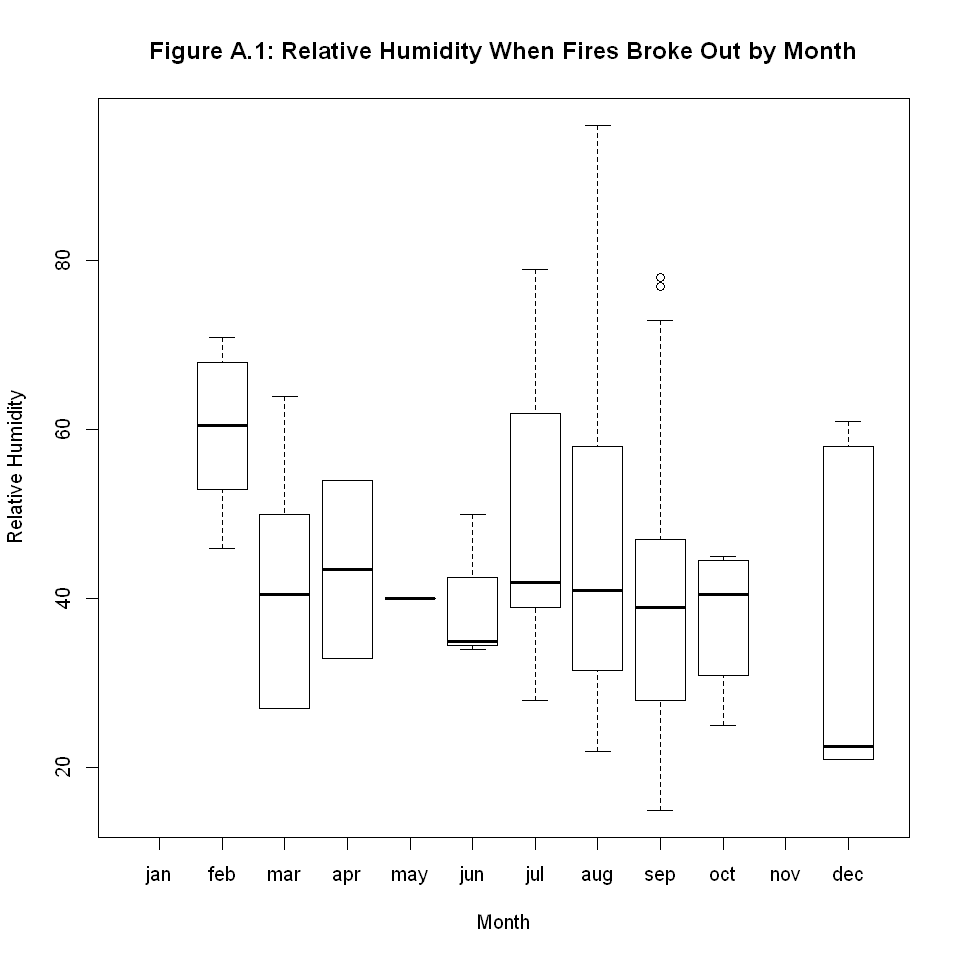

In [88]:
options(repr.plot.width=8, repr.plot.height=8)
boxplot(RH ~ month, data = fire.sub, 
  xlab = "Month", ylab = "Relative Humidity",
  main = "Figure A.1: Relative Humidity When Fires Broke Out by Month")

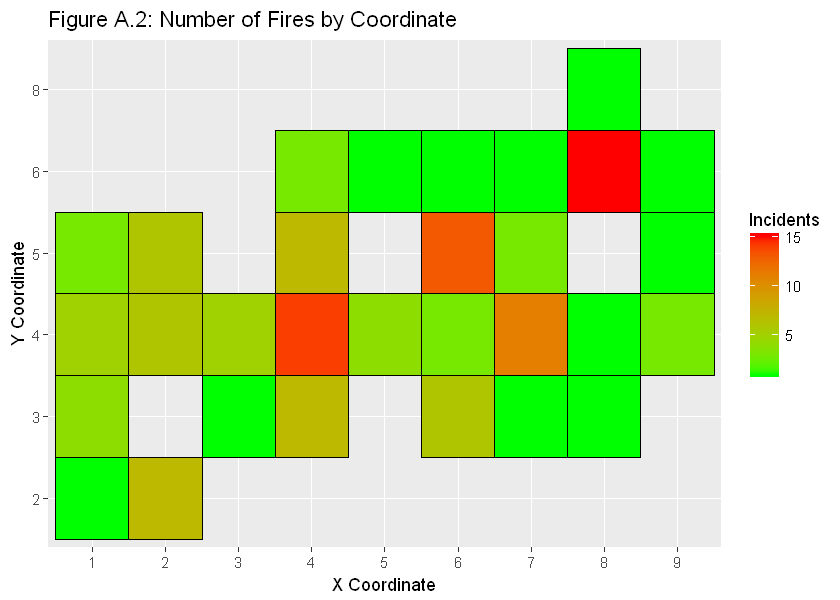

In [89]:
incidents = fire.sub %>% group_by(X, Y) %>% summarise(occur = n())

options(repr.plot.width=7, repr.plot.height=5)
ggplot(incidents, aes(X, Y, fill = occur)) + geom_tile(colour = "black") + 
scale_fill_gradient(low="green", high="red") +labs(x="X Coordinate", y="Y Coordinate",
       title = "Figure A.2: Number of Fires by Coordinate", fill="Incidents")

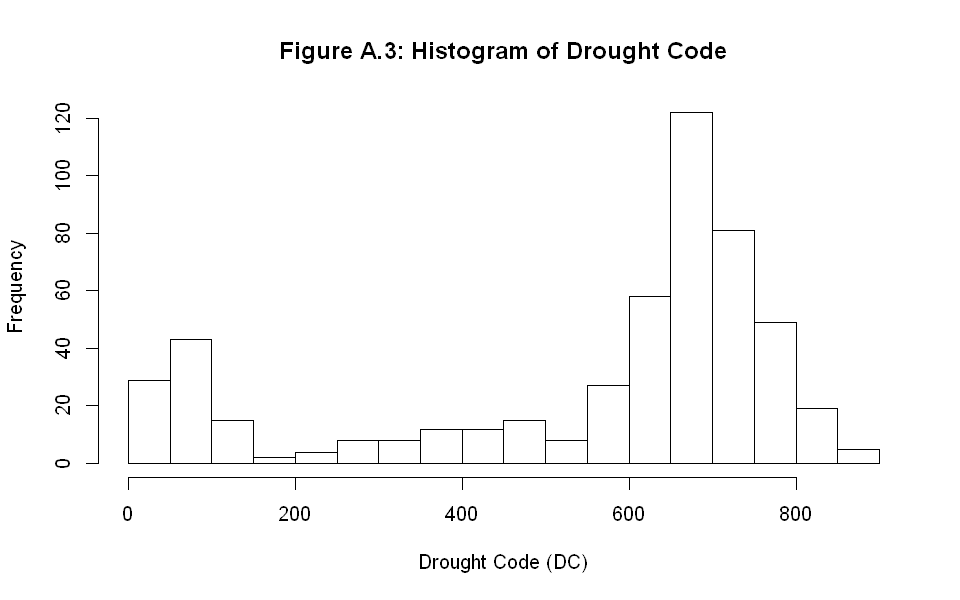

In [90]:
options(repr.plot.width=8, repr.plot.height=5)
hist(wildfires$DC, breaks = 15, 
    main = "Figure A.3: Histogram of Drought Code", xlab = "Drought Code (DC)")

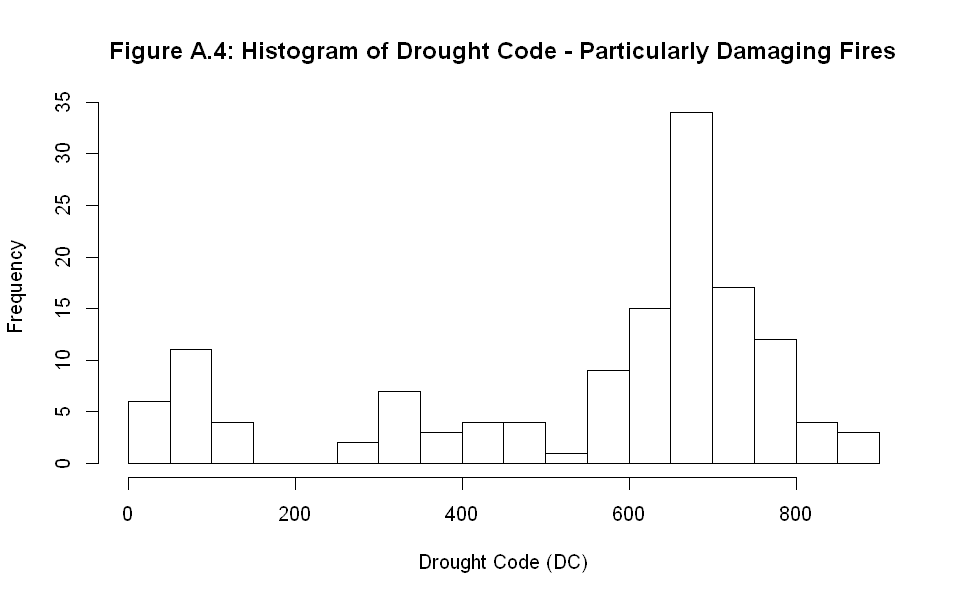

In [91]:
options(repr.plot.width=8, repr.plot.height=5)
hist(fire.sub$DC, breaks = 15, 
     main = "Figure A.4: Histogram of Drought Code - Particularly Damaging Fires", 
     xlab = "Drought Code (DC)")